In [1]:
import pandas as pd 
df = pd.read_csv("all_notes.csv")
df.head()

,letter_id,n_footnote,n_sentence,text_footnote,text_sentence
0,10013,3,2,"<persName xmlns=""http://www.tei-c.org/ns/1.0"">...",Quid in hoc ęvo litteratissimo te iuvene vener...
1,10013,4,3,Vgl. dazu etwa Bullingers Aufzeichnungen über ...,"Est profecto nihil, cui in promptu sint tot vo..."
2,10013,5,3,= exercites.,"Est profecto nihil, cui in promptu sint tot vo..."
3,10013,6,4,Die Rede ist hier von handschriftlichen Abhand...,Quicquid etiam lucubrationum tuarum<note xmlns...
4,10013,7,6,"Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improban..."


In [24]:
type(df["letter_id"][0])

numpy.int64

In [30]:
# get the letter ids matching to the editions:

import os

id_to_edition = {}

for paths, dirs, files in os.walk("../editions/hbbw"):
    for filename in files:
        filename = filename.split(".")[0]  # remove file extension
        edition, edition_letter_id, letter_id = filename.split("_")
        id_to_edition[int(letter_id)] = edition


df["edition"] = df["letter_id"].map(id_to_edition)
if df.isnull().sum().sum() != 0:
    print("Created some NaNs :/")

# there are more letters in the map than in the DF. This works, but what is the reason?
# Maybe not all letters have footnotes? Almost impossible. Maybe keine Textkritischen fussnoten...
# print(len(id_to_edition))  # 3141
# print(len(pd.unique(df["letter_id"])))  # 2852


df.head()

,letter_id,n_footnote,n_sentence,text_footnote,text_sentence,edition
0,10013,3,2,"<persName xmlns=""http://www.tei-c.org/ns/1.0"">...",Quid in hoc ęvo litteratissimo te iuvene vener...,20A
1,10013,4,3,Vgl. dazu etwa Bullingers Aufzeichnungen über ...,"Est profecto nihil, cui in promptu sint tot vo...",20A
2,10013,5,3,= exercites.,"Est profecto nihil, cui in promptu sint tot vo...",20A
3,10013,6,4,Die Rede ist hier von handschriftlichen Abhand...,Quicquid etiam lucubrationum tuarum<note xmlns...,20A
4,10013,7,6,"Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improban...",20A


In [2]:
footnotes_per_letter = df["letter_id"].value_counts()

footnotes_per_letter.sort_values(ascending=False).head(10)


letter_id
10053    590
10050    307
11755    227
11503    212
10135    177
12659    173
12080    169
10023    163
13019    161
12890    153
Name: count, dtype: int64

<Axes: >

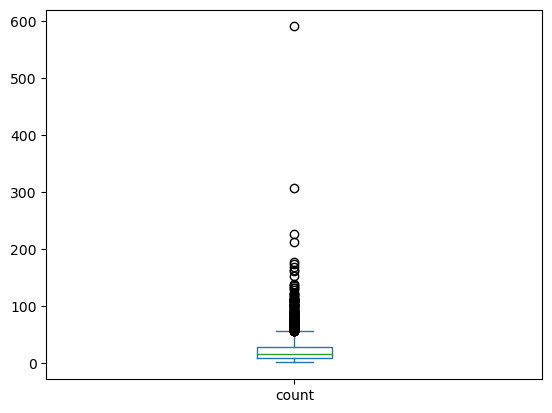

In [6]:
# plt = footnotes_per_letter.plot.bar(xticks=[])
footnotes_per_letter.plot.box()




In [74]:
import re
def classify_footnote(text):

    # Todo: find good regex for the classes
    cross_ref = r"(^[Vv]gl\.|^[Ss]iehe)"

    # Todo: Bibelstellen regex -> bible ref

    # Person name
    bio_regex = r"<persName.*?</persName>\.?$"

    lex_regex = r"(^=|[A-Za-zäöüÄÖÜ]+\.|[A-Za-zäöüÄÖÜ]+: [A-Za-zäöüÄÖÜ]+|\S+? \S+?\.\s{5,}\|)"

    # note: what does a.R. stand for really=
    ad_rem = r"a\.R\.:"

    bibl = r"<bibl"

    # Todo: "nicht erhalten", "unbekannt" etc. type='missing'

    if re.match(cross_ref, text):
        return "cross_ref"

    if re.match(ad_rem, text):
        return "ad_rem"

    elif re.match(bio_regex, text):
        return "bio"
    
    elif re.match(lex_regex, text):
        return "lex"
    
    elif re.match(bibl, text):
        return "bibl"

    else:
        return "misc"

In [ ]:
#todo: add foonote position, length, 
# calculate average length, over time/edition

In [75]:
df["type"] = df["text_footnote"].apply(classify_footnote)

print(df["type"].value_counts())

# new order
df = df[["letter_id", "n_footnote", "n_sentence", "type", "text_footnote", "text_sentence"]]
df.to_csv("all_notes_classified.csv")

type
misc         41601
lex           7835
cross_ref     7246
bio           6546
bibl           570
Name: count, dtype: int64
